In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import itertools
from time import sleep
import os
import seaborn as sns

In [2]:
# get the DF used for setting the weights and analysis
print datetime.datetime.now()
validFilePaths = []
for f in os.listdir("data/anomaly_data"):
    filePath = os.path.join("data/anomaly_data", f)
    if os.path.isdir(filePath):
        continue
    if os.stat(filePath).st_size <= 3:
        continue
    validFilePaths.append(filePath)
    
numF = int(0.5 * len(validFilePaths))
print 'Using this many files {0}'.format(numF)
validFilePaths = np.random.choice(validFilePaths, numF, replace=False)
df_list = (pd.read_csv(f) for f in validFilePaths)
df = pd.concat(df_list, ignore_index=True)
df1 = df[df['radiant_win'].notnull()]

2017-05-23 18:24:03.028884
Using this many files 4978


In [3]:

df2 = pd.DataFrame(np.loadtxt('data/goodAnomaliesResidual.csv', delimiter = ','), 
                 columns = ["match_id", "residual"])

df = df1.merge(df2, left_on='match_id', right_on='match_id')

matchDictionary = {}
heroColumns = [filter(lambda x: z in x, df.columns) for z in ['hero_id']][0]

# for each row, this function will return all the heroes that the match belongs in
# for example, if the match had an AM and Spectre, we should place this match in each of those bags
def heroesForMatch(row):
    pass

In [4]:
df = df[~df['match_id'].duplicated()]

In [5]:
df = df.sort_values(by='residual', ascending=False)

In [6]:
df

,barracks_status_dire,barracks_status_radiant,dire_pos1,dire_pos1_ancient_kills,dire_pos1_apm,dire_pos1_assists,dire_pos1_camps_stacked,dire_pos1_courier_kills,dire_pos1_deaths,dire_pos1_denies,...,radiant_pos5_rune_pickups,radiant_pos5_sentry_uses,radiant_pos5_totalgold,radiant_pos5_totalxp,radiant_pos5_tower_kills,radiant_pos5_xpm,radiant_win,tower_status_dire,tower_status_radiant,residual
7,0,63,2,NaN,NaN,11,NaN,NaN,19,2,...,NaN,NaN,16907.0,21933.0,NaN,624,True,0,2046,22.209061
82,63,0,44,NaN,NaN,11,NaN,NaN,5,4,...,NaN,NaN,14480.0,19393.0,NaN,454,False,1846,0,21.312656
233,0,63,8,NaN,NaN,10,NaN,NaN,8,2,...,NaN,NaN,16921.0,22227.0,NaN,465,True,0,1828,21.192530
272,63,3,89,NaN,NaN,12,NaN,NaN,4,0,...,NaN,NaN,10662.0,14626.0,NaN,321,False,1958,6,19.102757
268,63,0,44,NaN,NaN,8,NaN,NaN,4,3,...,NaN,NaN,20607.0,23789.0,NaN,501,False,1958,0,18.733578
247,63,0,18,NaN,NaN,16,NaN,NaN,6,10,...,NaN,NaN,10009.0,16950.0,NaN,359,False,1958,0,17.452068
246,0,63,2,NaN,NaN,7,NaN,NaN,17,0,...,NaN,NaN,19660.0,25849.0,NaN,614,True,0,1958,16.780128
94,0,63,1,NaN,NaN,1,NaN,NaN,4,15,...,NaN,NaN,16763.0,15264.0,NaN,489,True,0,1854,16.365294
194,63,2,94,NaN,NaN,11,NaN,NaN,0,0,...,NaN,NaN,8353.0,9576.0,NaN,235,False,1974,0,16.160429
257,0,63,62,NaN,NaN,7,NaN,NaN,10,1,...,NaN,NaN,18215.0,24042.0,NaN,491,True,0,1840,16.092903


In [7]:
df['match_id'].values.tolist()

[3123250944,
 3123892992,
 3123652352,
 3123800064,
 3123271936,
 3123863552,
 3123730176,
 3123094016,
 3123779328,
 3123843584,
 3123589888,
 3123481088,
 3123324416,
 3123663360,
 3123095552,
 3123088384,
 3123254784,
 3123678976,
 3123794688,
 3123770624,
 3123429376,
 3123927040,
 3123057664,
 3123564288,
 3123871232,
 3123404544,
 3122989568,
 3123003904,
 3123542016,
 3123910912,
 3123068416,
 3123180032,
 3123582976,
 3123028992,
 3123269376,
 3123865856,
 3123157248,
 3123020544,
 3123665152,
 3123847936,
 3123035904,
 3123442944,
 3123929856,
 3123369728,
 3123340288,
 3123438336,
 3123744256,
 3123484416,
 3123789568,
 3123740416,
 3123898368,
 3123224064,
 3123148288,
 3123373568,
 3123070208,
 3123877120,
 3123591168,
 3123707136,
 3123825920,
 3123472640,
 3123795968,
 3123113984,
 3123356672,
 3123678464,
 3123339264,
 3123153920,
 3123247616,
 3123431680,
 3123424768,
 3123331072,
 3123800320,
 3123112704,
 3123452160,
 3123097344,
 3123095808,
 3123604736,
 3123510528,

In [8]:
df['residual'].values.tolist()

[22.209060668945312,
 21.31265640258789,
 21.192529678344727,
 19.10275650024414,
 18.733577728271484,
 17.452068328857422,
 16.780128479003906,
 16.365293502807617,
 16.160429000854492,
 16.09290313720703,
 15.774358749389648,
 15.649096488952637,
 15.558990478515625,
 15.478443145751953,
 15.258999824523926,
 15.028358459472656,
 14.751729965209961,
 14.522700309753418,
 14.209027290344238,
 14.204046249389648,
 14.188694953918457,
 14.107854843139648,
 13.942862510681152,
 13.873666763305664,
 13.83987045288086,
 13.628384590148926,
 13.19204044342041,
 12.994770050048828,
 12.832275390625,
 12.653337478637695,
 11.832610130310059,
 11.63698959350586,
 11.306469917297363,
 11.213419914245605,
 10.120747566223145,
 9.950775146484375,
 9.94602108001709,
 9.781078338623047,
 9.71461296081543,
 9.689166069030762,
 9.54057502746582,
 9.37009334564209,
 9.2630615234375,
 9.224114418029785,
 9.19074821472168,
 9.17093563079834,
 9.121095657348633,
 9.075179100036621,
 9.060911178588867,
 8

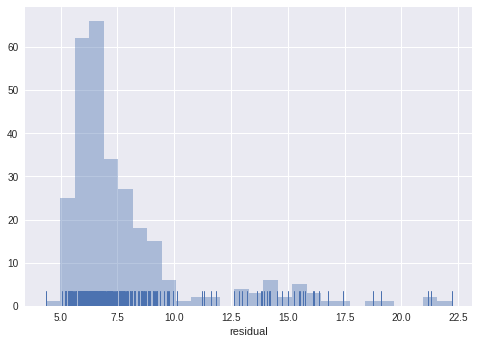

In [9]:
sns.distplot(df['residual'],  kde=False, rug=True)
plt.show()

In [10]:
len(df)

289

In [11]:
plt.close()

In [12]:
residuals = df['residual'].values.tolist()

In [13]:
np.max(residuals) - np.min(residuals)

17.860499382019043

In [14]:
df['residual']

7      22.209061
82     21.312656
233    21.192530
272    19.102757
268    18.733578
247    17.452068
246    16.780128
94     16.365294
194    16.160429
257    16.092903
48     15.774359
92     15.649096
148    15.558990
191    15.478443
95     15.259000
179    15.028358
264    14.751730
127    14.522700
175    14.209027
241    14.204046
208    14.188695
9      14.107855
258    13.942863
70     13.873667
38     13.839870
129    13.628385
139    13.192040
132    12.994770
178    12.832275
280    12.653337
         ...    
152     5.680099
147     5.675032
234     5.665591
10      5.663660
160     5.616734
102     5.609009
276     5.550035
224     5.511973
84      5.500847
170     5.476671
185     5.443802
113     5.442971
78      5.427026
204     5.425073
196     5.419589
97      5.415268
55      5.400080
186     5.392486
221     5.370852
243     5.366636
154     5.345079
142     5.338479
107     5.240119
75      5.229576
235     5.225935
0       5.222681
143     5.215228
262     5.2080